In [ ]:
from google.colab import files

uploaded = files.upload()

Saving datasets1_smr_fng_fh2o_Tsr_Psr.mat to datasets1_smr_fng_fh2o_Tsr_Psr.mat
Saving datasets2_smr_fng_fh2o_Tsr_Psr.mat to datasets2_smr_fng_fh2o_Tsr_Psr.mat


In [ ]:
import scipy.io
import numpy as np

# Load the first MAT file
data1 = scipy.io.loadmat('datasets1_smr_fng_fh2o_Tsr_Psr.mat')

# Extract the data matrices from the first file
data1_matrix = np.concatenate((data1['all_FNG_samples'],
                                data1['all_FH2O_samples'],
                                data1['all_Tsr_samples'],
                                data1['all_Psr_samples'],
                                data1['all_xh2'],
                                data1['all_f'],
                                data1['net_energy']), axis=1)

# Load the second MAT file
data2 = scipy.io.loadmat('datasets2_smr_fng_fh2o_Tsr_Psr.mat')

# Extract the data matrices from the second file
data2_matrix = np.concatenate((data2['all_FNG_samples'],
                                data2['all_FH2O_samples'],
                                data2['all_Tsr_samples'],
                                data2['all_Psr_samples'],
                                data2['all_xh2'],
                                data2['all_f'],
                                data2['net_energy']), axis=1)

# Concatenate the two data matrices vertically
data_array = np.concatenate((data1_matrix, data2_matrix), axis=0)
print(data_array.shape)

# Display the first few rows of the resulting array
print(data_array[:10, :])



(1600, 7)
[[8.52141653e+01 2.92955696e+02 9.67922577e+02 3.18964488e+01
  9.78617459e-01 3.27510669e+02 9.73420603e+05]
 [8.52141653e+01 2.92955696e+02 9.67922577e+02 3.80977290e+01
  9.74274179e-01 3.23547999e+02 9.50881125e+05]
 [8.52141653e+01 2.92955696e+02 9.16987537e+02 3.18964488e+01
  9.64641476e-01 3.15092728e+02 9.02789151e+05]
 [8.52141653e+01 2.92955696e+02 9.16987537e+02 3.80977290e+01
  9.56819206e-01 3.08545043e+02 8.65548026e+05]
 [8.52141653e+01 2.92955696e+02 9.75290767e+02 3.18964488e+01
  9.79926443e-01 3.28724055e+02 9.80322367e+05]
 [8.52141653e+01 2.92955696e+02 9.75290767e+02 3.80977290e+01
  9.75974799e-01 3.25088112e+02 9.59641164e+05]
 [8.52141653e+01 2.92955696e+02 9.27695118e+02 3.18964488e+01
  9.68424288e-01 3.18359902e+02 9.21372043e+05]
 [8.52141653e+01 2.92955696e+02 9.27695118e+02 3.80977290e+01
  9.61436532e-01 3.12376686e+02 8.87341103e+05]
 [8.52141653e+01 2.92955696e+02 9.01556912e+02 3.18964488e+01
  9.58228513e-01 3.09704538e+02 8.72142761e+05]


In [ ]:
# max xh2
fifth_column = data_array[:, 4]

# Find the maximum and minimum values
max_value = np.max(fifth_column)
min_value = np.min(fifth_column)

# Print the results
print("Max value of xh2:", max_value)
print("Min value of xh2:", min_value)

Max value of xh2: 0.989439143
Min value of xh2: 0.920561724


In [ ]:
# max f
sixth_column = data_array[:, 5]

# Find the maximum and minimum values
max_value = np.max(sixth_column)
min_value = np.min(sixth_column)

# Print the results
print("Max value of f:", max_value)
print("Min value of f:", min_value)

Max value of f: 468.617482
Min value of f: 281.668752


In [ ]:
# Building Neural Networks

Epoch 1/100
342/342 [==============================] - 5s 9ms/step - loss: 76080.7266 - val_loss: 1249.3513
Epoch 2/100
342/342 [==============================] - 2s 7ms/step - loss: 1222.6097 - val_loss: 1264.1906
Epoch 3/100
342/342 [==============================] - 2s 5ms/step - loss: 1219.7080 - val_loss: 1217.0930
Epoch 4/100
342/342 [==============================] - 2s 7ms/step - loss: 1210.3597 - val_loss: 1283.5543
Epoch 5/100
342/342 [==============================] - 1s 3ms/step - loss: 1217.7545 - val_loss: 1222.5586
Epoch 6/100
342/342 [==============================] - 1s 2ms/step - loss: 1203.0148 - val_loss: 1261.6277
Epoch 7/100
342/342 [==============================] - 1s 2ms/step - loss: 1180.2869 - val_loss: 1163.5984
Epoch 8/100
342/342 [==============================] - 1s 2ms/step - loss: 1173.9132 - val_loss: 1184.6842
Epoch 9/100
342/342 [==============================] - 1s 2ms/step - loss: 1166.5323 - val_loss: 1138.6666
Epoch 10/100
342/342 [==============

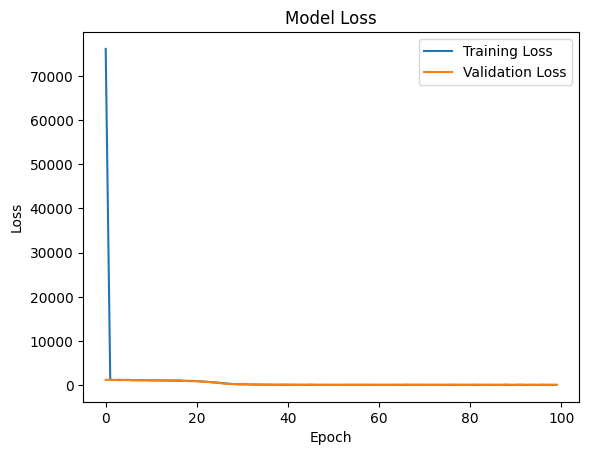

In [ ]:
# 4 inputs one output(fh2)
import numpy as np
import pandas as pd
from prettytable import PrettyTable
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# X represents first two columns as input features and y represents the column as target outputs
X = data_array[:, :4]
y = data_array[:, 5]  # corrected indices for target outputs

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# define the deep neural network model
model = Sequential()
model.add(Dense(5, input_dim=4, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'))  # adding L2 regularization
model.add(Dense(5, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'))
model.add(Dense(5, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'))
model.add(Dense(1, activation='linear'))

# compile the model
opt = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opt)

# train the model on the training set
history = model.fit(X_train, y_train, epochs=100, batch_size=3, validation_split=0.2)

# evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse)

# use the trained model to make predictions on the testing set
y_pred = model.predict(X_test)

# calculate R-squared for each output
r_squared = r2_score(y_test, y_pred, multioutput='raw_values')
print("R-squared on Testing Set:")
for i, r2 in enumerate(r_squared):
    print(f"Output {i + 1}: {r2}")

# print the actual and predicted values for NH3 concentration
table = PrettyTable(['Actual molar flow rate of reactor outlet (kmol/h)', 'Predicted molar flow rate of reactor outlet (kmol/h)'])
for i in range(len(y_test.flatten())):
    table.add_row([y_test.flatten()[i], y_pred.flatten()[i]])
print(table)

# plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
# Save the model to a file
model.save('SMR_fh2.keras')

In [ ]:
# 4 inputs one output(ne)

Epoch 1/100
342/342 [==============================] - 2s 3ms/step - loss: 1367509434368.0000 - val_loss: 1344479821824.0000
Epoch 2/100
342/342 [==============================] - 1s 2ms/step - loss: 1367448879104.0000 - val_loss: 1344478773248.0000
Epoch 3/100
342/342 [==============================] - 1s 2ms/step - loss: 1367449141248.0000 - val_loss: 1344477855744.0000
Epoch 4/100
342/342 [==============================] - 1s 3ms/step - loss: 1367447961600.0000 - val_loss: 1344477331456.0000
Epoch 5/100
342/342 [==============================] - 1s 3ms/step - loss: 1367446913024.0000 - val_loss: 1344476545024.0000
Epoch 6/100
342/342 [==============================] - 1s 2ms/step - loss: 1367446519808.0000 - val_loss: 1344476020736.0000
Epoch 7/100
342/342 [==============================] - 1s 3ms/step - loss: 1367445733376.0000 - val_loss: 1344475234304.0000
Epoch 8/100
342/342 [==============================] - 1s 4ms/step - loss: 1367444422656.0000 - val_loss: 1344470122496.0000


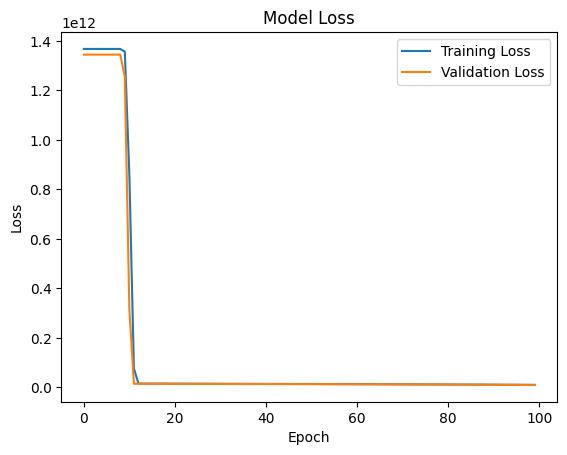

In [ ]:
import numpy as np
import pandas as pd
from prettytable import PrettyTable
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# X represents first two columns as input features and y represents the column as target outputs
X = data_array[:, :4]
y = data_array[:, 6]  # corrected indices for target outputs

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# define the deep neural network model
model = Sequential()
model.add(Dense(5, input_dim=4, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'))  # adding L2 regularization
model.add(Dense(5, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'))
model.add(Dense(5, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'))
model.add(Dense(1, activation='linear'))

# compile the model
opt = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opt)

# train the model on the training set
history = model.fit(X_train, y_train, epochs=100, batch_size=3, validation_split=0.2)

# evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse)

# use the trained model to make predictions on the testing set
y_pred = model.predict(X_test)

# calculate R-squared for each output
r_squared = r2_score(y_test, y_pred, multioutput='raw_values')
print("R-squared on Testing Set:")
for i, r2 in enumerate(r_squared):
    print(f"Output {i + 1}: {r2}")

# print the actual and predicted values for NH3 concentration
table = PrettyTable(['Actual net energy (cal/s)', 'Predicted net energy (cal/s)'])
for i in range(len(y_test.flatten())):
    table.add_row([y_test.flatten()[i], y_pred.flatten()[i]])
print(table)

# plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
# Save the model to a file
model.save('SMR_ne.keras')